# Biological data analysis


## Jurga Jasinskaitė

In [20]:
import pathlib
import os
import re
import math
import random
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftshift
import pywt
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.signal as signal
import scipy.stats as stats
import scipy
import mne
import wave
from sklearn.decomposition import FastICA
sns.set()

Evaluation:

- Comments 25%
- Applied methods 25%
- Figures 25%
- Results 25%

---
>> **TASK**
>>
>> Microphones were placed in different locations.
>> 8 recordings from different microphones placed in A7 directory.
>>
>> X1... X8.wav
>>
>> All microphones captured the same environment, but since they were in
>> different locations the source-microphone distances are different.
>>
>> - Separate meaningful sources from the noise.
>>
>> - Plot the signals and their frequency compositions.
>>
>>
---

To import sound `wavfile` from `scipy` can be used

In [165]:
from scipy.io import wavfile

> #### First the analysis is done with first file only to see what are the parameters of recordings, what is the signal duration and rate, how does the signal look plotted.

In [166]:
X1 = wave.open('X1.wav','r')

In [167]:
X1.getparams()

_wave_params(nchannels=1, sampwidth=2, framerate=44100, nframes=930820, comptype='NONE', compname='not compressed')

> #### Signal duration in seconds:

In [168]:
930820/44100

21.10702947845805

In [169]:
signal_1_raw = X1.readframes(-1)
signal_1 = np.fromstring(signal_1_raw, 'Int16')

<ipython-input-169-ffc5df673b11>:2: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  signal_1 = np.fromstring(signal_1_raw, 'Int16')
<ipython-input-169-ffc5df673b11>:2: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  signal_1 = np.fromstring(signal_1_raw, 'Int16')


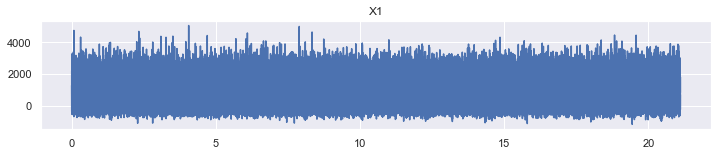

In [170]:
fs = X1.getframerate()
timing = np.linspace(0, len(signal_1)/fs, num=len(signal_1))

plt.figure(figsize=(12,2))
plt.title('X1')
plt.plot(timing,signal_1)
plt.show()

> #### Next analysis is repeated for all recodings seperatly, files are plotted.

In [171]:
X2 = wave.open('X2.wav','r')
signal_raw_2 = X2.readframes(-1)
signal_2 = np.fromstring(signal_raw_2, 'Int16')

X3 = wave.open('X3.wav','r')
signal_raw_3 = X3.readframes(-1)
signal_3 = np.fromstring(signal_raw_3, 'Int16')

X4 = wave.open('X4.wav','r')
signal_raw_4 = X4.readframes(-1)
signal_4 = np.fromstring(signal_raw_4, 'Int16')

X5 = wave.open('X5.wav','r')
signal_raw_5 = X5.readframes(-1)
signal_5 = np.fromstring(signal_raw_5, 'Int16')

X6 = wave.open('X6.wav','r')
signal_raw_6 = X6.readframes(-1)
signal_6 = np.fromstring(signal_raw_6, 'Int16')

X7 = wave.open('X7.wav','r')
signal_raw_7 = X7.readframes(-1)
signal_7 = np.fromstring(signal_raw_7, 'Int16')

X8 = wave.open('X8.wav','r')
signal_raw_8 = X8.readframes(-1)
signal_8 = np.fromstring(signal_raw_8, 'Int16')

<ipython-input-171-3739528c2c79>:3: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  signal_2 = np.fromstring(signal_raw_2, 'Int16')
<ipython-input-171-3739528c2c79>:3: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  signal_2 = np.fromstring(signal_raw_2, 'Int16')
<ipython-input-171-3739528c2c79>:7: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  signal_3 = np.fromstring(signal_raw_3, 'Int16')
<ipython-input-171-3739528c2c79>:7: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  signal_3 = np.fromstring(signal_raw_3, 'Int16')
<ipython-input-171-3739528c2c79>:11: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  signal_4 = np.fromstring(signal_raw_4, '

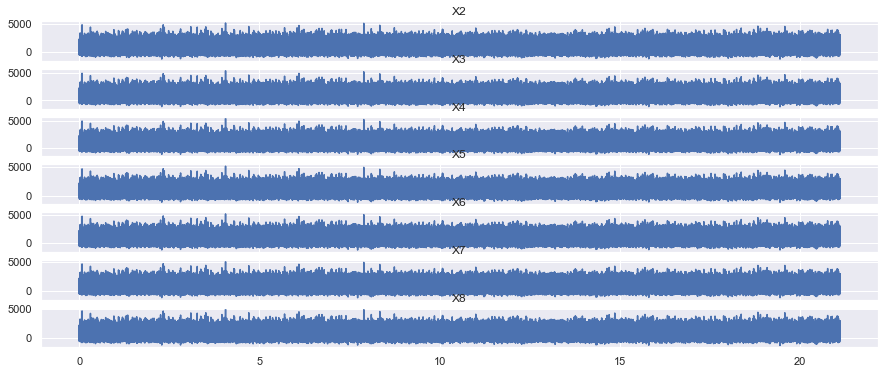

In [360]:
fig = plt.figure(figsize=(15, 6))

plt.subplot(7, 1, 1)
plt.title('X2')
plt.plot(timing,signal_2)

plt.subplot(7, 1, 2)
plt.title('X3')
plt.plot(timing,signal_4)

plt.subplot(7, 1, 3)
plt.title('X4')
plt.plot(timing,signal_4)

plt.subplot(7, 1, 4)
plt.title('X5')
plt.plot(timing,signal_5)

plt.subplot(7, 1, 5)
plt.title('X6')
plt.plot(timing,signal_7)

plt.subplot(7, 1, 6)
plt.title('X7')
plt.plot(timing,signal_7)

plt.subplot(7, 1, 7)
plt.title('X8')
plt.plot(timing,signal_8)

plt.show()

> #### Files are zipped into one file and Independent component analysis (ICA) ir performed on zipped list. ICA was chosen as an algorithm for signal and noise separation because it separates data into independant aaditive subcomponents than can be visualised and manipulated separatly later on (useful in this case since we have a problem simmilar to cocktail party problem). Then results are split again to corespond to each file that was read in the first step.

In [173]:
X = list(zip(signal_1, signal_2, signal_3, signal_4, signal_5, signal_6, signal_7, signal_8))

In [174]:
from sklearn.decomposition import FastICA
ica = FastICA(n_components=8, random_state=0)
ica_result= ica.fit_transform(X)

In [175]:
ica_result.shape 

(930820, 8)

In [176]:
result_signal_1 = ica_result[:,0]
result_signal_2 = ica_result[:,1]
result_signal_3 = ica_result[:,2]
result_signal_4 = ica_result[:,3]
result_signal_5 = ica_result[:,4]
result_signal_6 = ica_result[:,5]
result_signal_7 = ica_result[:,6]
result_signal_8 = ica_result[:,7]

> #### Files after ICA are plotted. It is clear that ICA worked, but only 3 sounds were exctracted and separated.

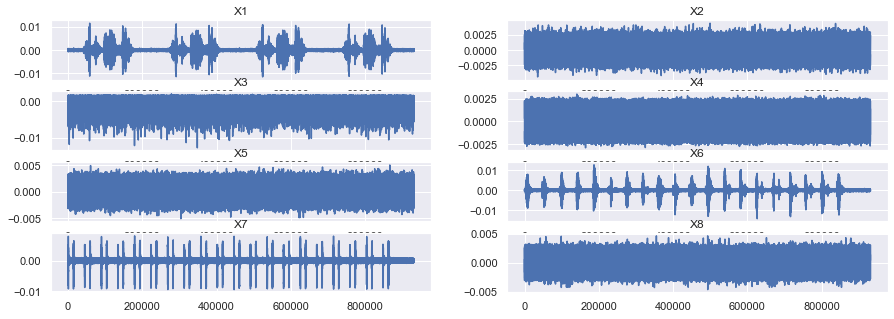

In [177]:
fig = plt.figure(figsize=(15, 5))

plt.subplot(4, 2, 1)
plt.title('X1')
plt.plot(result_signal_1)

plt.subplot(4, 2, 2)
plt.title('X2')
plt.plot(result_signal_2)

plt.subplot(4, 2, 3)
plt.title('X3')
plt.plot(result_signal_3)

plt.subplot(4, 2, 4)
plt.title('X4')
plt.plot(result_signal_4)

plt.subplot(4, 2, 5)
plt.title('X5')
plt.plot(result_signal_5)

plt.subplot(4, 2, 6)
plt.title('X6')
plt.plot(result_signal_6)

plt.subplot(4, 2, 7)
plt.title('X7')
plt.plot(result_signal_7)

plt.subplot(4, 2, 8)
plt.title('X8')
plt.plot(result_signal_8)

plt.show()

> #### Files are convert to integer (so we can save as PCM 16-bit Wave files), mapped the appropriate range for int16 audio and volume is increased in order to better hear the recordings that are saved in the last step. After listening to records, three sounds are separated: a man counting from 1 to 20, birds chripping and heart beating.

In [178]:
result_signal_1_int = np.int16(result_signal_1*32767*100)
result_signal_2_int = np.int16(result_signal_2*32767*100)
result_signal_3_int = np.int16(result_signal_3*32767*100)
result_signal_4_int = np.int16(result_signal_4*32767*100)
result_signal_5_int = np.int16(result_signal_5*32767*100)
result_signal_6_int = np.int16(result_signal_6*32767*100)
result_signal_7_int = np.int16(result_signal_7*32767*100)
result_signal_8_int = np.int16(result_signal_8*32767*100)

# Write wave files to listen to them 
wavfile.write("result_signal_1.wav", fs, result_signal_1_int) 
wavfile.write("result_signal_2.wav", fs, result_signal_2_int) 
wavfile.write("result_signal_3.wav", fs, result_signal_3_int)
wavfile.write("result_signal_4.wav", fs, result_signal_4_int) 
wavfile.write("result_signal_5.wav", fs, result_signal_5_int) 
wavfile.write("result_signal_6.wav", fs, result_signal_6_int) 
wavfile.write("result_signal_7.wav", fs, result_signal_7_int) 
wavfile.write("result_signal_8.wav", fs, result_signal_8_int) 

> #### Below frequency plot for extracted sounds are ploted from clean data after ICA. Numbers counting sound has a reapeating patter in frequency. Heartbeat sound has clear peak in frequency at 50-150 Hz and birds chirping has no distinct freqency.

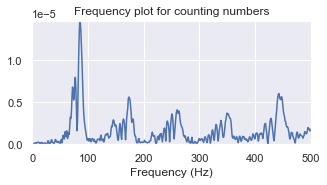

In [179]:
sample_rate=44100
plt.figure(figsize=(5,5))
plt.subplot(212)
A = np.fft.fft(result_signal_6, sample_rate) / (len(result_signal_6)/2.0)
freq = np.linspace(sample_rate//2*-1, sample_rate//2, len(A))
response = np.abs(fftshift(A))
plt.title('Frequency plot for counting numbers')
plt.plot(freq, response)
plt.axis([0, 500, 0, max(response)])
plt.xlabel("Frequency (Hz)");

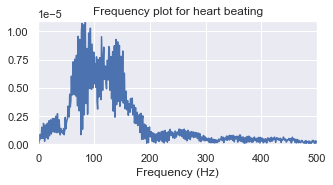

In [180]:
sample_rate=44100
plt.figure(figsize=(5,5))
plt.subplot(212)
A = np.fft.fft(result_signal_7, sample_rate) / (len(result_signal_7)/2.0)
freq = np.linspace(sample_rate//2*-1, sample_rate//2, len(A))
response = np.abs(fftshift(A))
plt.title('Frequency plot for heart beating')
plt.plot(freq, response)
plt.axis([0, 500, 0, max(response)])
plt.xlabel("Frequency (Hz)");

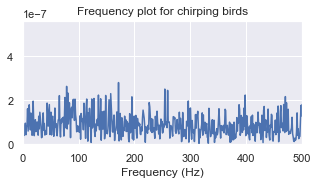

In [181]:
sample_rate=44100
plt.figure(figsize=(5,5))
plt.subplot(212)
A = np.fft.fft(result_signal_1, sample_rate) / (len(result_signal_1)/2.0)
freq = np.linspace(sample_rate//2*-1, sample_rate//2, len(A))
response = np.abs(fftshift(A))
plt.title('Frequency plot for chirping birds')
plt.plot(freq, response)
plt.axis([0, 500, 0, max(response)])
plt.xlabel("Frequency (Hz)");

---
>> **TASK**
>>
>> EEG recordings capture post synaptic potentials generated by networks in the brain at different frequencies as well as noise from surroundings and other body parts.
>>
>> ![power](./powerBandsEEG.jpeg)
>>
>> The strength of each source in different EEG channels depend on their relative distance from each channel.
>> Frontal channels are closer to eyes and we observe diminishing eyeblink amplitudes from frontal to ocipital channels.
>> Ocipital channels contains more alpha (~12 Hz) brain activity. Line noise (50 Hz) is equally distributed accross all channels.
>>
>> - Simulate EEG recording. At least 6 channels from different locations. Signal must contain eye blinks, line noise, and brain activity.
>> - Separate mixed simulated EEG recording back to sources.
>> - Plot simulated and separated signals.
>>
---

> #### Creating noise, alpha wave and blink signals separetly and joining them.

In [258]:
np.random.seed(0)
dt = 0.02 
Fs = 1 / dt 
t = np.arange(0, 100, dt)
# noise:
nse = np.random.randn(len(t))
r = np.exp(-t / 0.05)
cnse = np.convolve(nse, r) * dt
cnse = cnse[:len(t)]

noise =(0.1 * np.sin(1 * np.pi * t) + cnse)*500

In [259]:
F = 10
T = 1000/F
Fs = 50
Ts = 1./Fs
N = int(T/Ts)
t = np.linspace(0, T, N)
alpha_wave = np.sin(2*np.pi*F*t)

In [260]:
noise_and_alpha = noise+alpha_wave

In [260]:
sample_rate = 5000
t1 = np.linspace(0, 35, sample_rate)
t2 = np.linspace(35, 37, sample_rate)
t3 = np.linspace(37, 45, sample_rate)
t4 = np.linspace(45, 47, sample_rate)
t5 = np.linspace(47, 65, sample_rate)
t6 = np.linspace(65, 69, sample_rate)
t7 = np.linspace(69, 100, sample_rate)

In [262]:
def gen_wave(Hz, sample_rate, length_sec, Amp, phase):
    t = np.linspace(0, length_sec, length_sec * sample_rate, endpoint=False)
    x = Amp*(np.sin(Hz * 2 * np.pi * t + phase))
    return(x, t)
sample_rate = 5000
length_sec = 1
blink, t = np.array(gen_wave(1.2, sample_rate, length_sec, 200, -0.5))

> #### Cretaing 6 channels of same data with eye blink being weaker i each one of them as seen from the plots below.

In [263]:
channel1_1 = pd.DataFrame({'time': t1,
                   'signal': noise_and_alpha})
channel1_2 = pd.DataFrame({'time': t2,
                   'signal': (((noise_and_alpha*0.5)+blink))})
channel1_3 = pd.DataFrame({'time': t3,
                   'signal': noise_and_alpha})
channel1_4 = pd.DataFrame({'time': t4,
                   'signal': ((noise*0.2+blink))})
channel1_5 = pd.DataFrame({'time': t5,
                   'signal': noise_and_alpha})
channel1_6 = pd.DataFrame({'time': t6,
                   'signal': ((blink+(noise*0.5)))})
channel1_7 = pd.DataFrame({'time': t7,
                   'signal': noise_and_alpha})

channel1 = channel1_1.append(channel1_2, ignore_index=True).append(channel1_3, ignore_index=True).append(channel1_4, ignore_index=True).append(channel1_5, ignore_index=True).append(channel1_6, ignore_index=True).append(channel1_7, ignore_index=True)

In [264]:
channel2_1 = pd.DataFrame({'time': t1,
                   'signal': noise_and_alpha})
channel2_2 = pd.DataFrame({'time': t2,
                   'signal': (((noise_and_alpha*0.5)+blink)*0.9)})
channel2_3 = pd.DataFrame({'time': t3,
                   'signal': noise_and_alpha})
channel2_4 = pd.DataFrame({'time': t4,
                   'signal': ((noise*0.2+blink)*0.9)})
channel2_5 = pd.DataFrame({'time': t5,
                   'signal': noise_and_alpha})
channel2_6 = pd.DataFrame({'time': t6,
                   'signal': ((blink+(noise*0.5))*0.9)})
channel2_7 = pd.DataFrame({'time': t7,
                   'signal': noise_and_alpha})

channel2 = channel2_1.append(channel2_2, ignore_index=True).append(channel2_3, ignore_index=True).append(channel2_4, ignore_index=True).append(channel2_5, ignore_index=True).append(channel2_6, ignore_index=True).append(channel2_7, ignore_index=True)

In [265]:
channel3_1 = pd.DataFrame({'time': t1,
                   'signal': noise_and_alpha})
channel3_2 = pd.DataFrame({'time': t2,
                   'signal': (((noise_and_alpha*0.5)+blink)*0.8)})
channel3_3 = pd.DataFrame({'time': t3,
                   'signal': noise_and_alpha})
channel3_4 = pd.DataFrame({'time': t4,
                   'signal': ((noise*0.2+blink)*0.8)})
channel3_5 = pd.DataFrame({'time': t5,
                   'signal': noise_and_alpha})
channel3_6 = pd.DataFrame({'time': t6,
                   'signal': ((blink+(noise*0.5))*0.8)})
channel3_7 = pd.DataFrame({'time': t7,
                   'signal': noise_and_alpha})

channel3 = channel3_1.append(channel3_2, ignore_index=True).append(channel3_3, ignore_index=True).append(channel3_4, ignore_index=True).append(channel3_5, ignore_index=True).append(channel3_6, ignore_index=True).append(channel3_7, ignore_index=True)

In [266]:
channel4_1 = pd.DataFrame({'time': t1,
                   'signal': noise_and_alpha})
channel4_2 = pd.DataFrame({'time': t2,
                   'signal': (((noise_and_alpha*0.5)+blink)*0.7)})
channel4_3 = pd.DataFrame({'time': t3,
                   'signal': noise_and_alpha})
channel4_4 = pd.DataFrame({'time': t4,
                   'signal': ((noise*0.2+blink)*0.7)})
channel4_5 = pd.DataFrame({'time': t5,
                   'signal': noise_and_alpha})
channel4_6 = pd.DataFrame({'time': t6,
                   'signal': ((blink+(noise*0.5))*0.7)})
channel4_7 = pd.DataFrame({'time': t7,
                   'signal': noise_and_alpha})

channel4 = channel4_1.append(channel4_2, ignore_index=True).append(channel4_3, ignore_index=True).append(channel4_4, ignore_index=True).append(channel4_5, ignore_index=True).append(channel4_6, ignore_index=True).append(channel4_7, ignore_index=True)

In [267]:
channel5_1 = pd.DataFrame({'time': t1,
                   'signal': noise_and_alpha})
channel5_2 = pd.DataFrame({'time': t2,
                   'signal': (((noise_and_alpha*0.5)+blink)*0.6)})
channel5_3 = pd.DataFrame({'time': t3,
                   'signal': noise_and_alpha})
channel5_4 = pd.DataFrame({'time': t4,
                   'signal': ((noise*0.2+blink)*0.6)})
channel5_5 = pd.DataFrame({'time': t5,
                   'signal': noise_and_alpha})
channel5_6 = pd.DataFrame({'time': t6,
                   'signal': ((blink+(noise*0.5))*0.6)})
channel5_7 = pd.DataFrame({'time': t7,
                   'signal': noise_and_alpha})

channel5 = channel5_1.append(channel5_2, ignore_index=True).append(channel5_3, ignore_index=True).append(channel5_4, ignore_index=True).append(channel5_5, ignore_index=True).append(channel5_6, ignore_index=True).append(channel5_7, ignore_index=True)

In [268]:
channel6_1 = pd.DataFrame({'time': t1,
                   'signal': noise_and_alpha})
channel6_2 = pd.DataFrame({'time': t2,
                   'signal': (((noise_and_alpha*0.5)+blink)*0.5)})
channel6_3 = pd.DataFrame({'time': t3,
                   'signal': noise_and_alpha})
channel6_4 = pd.DataFrame({'time': t4,
                   'signal': ((noise*0.2+blink)*0.5)})
channel6_5 = pd.DataFrame({'time': t5,
                   'signal': noise_and_alpha})
channel6_6 = pd.DataFrame({'time': t6,
                   'signal': ((blink+(noise*0.5))*0.5)})
channel6_7 = pd.DataFrame({'time': t7,
                   'signal': noise_and_alpha})
channel6 = channel6_1.append(channel6_2, ignore_index=True).append(channel6_3, ignore_index=True).append(channel6_4, ignore_index=True).append(channel6_5, ignore_index=True).append(channel6_6, ignore_index=True).append(channel6_7, ignore_index=True)

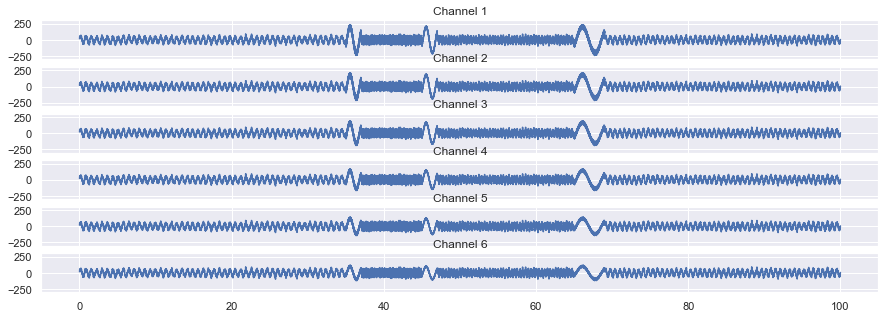

In [269]:
fig = plt.figure(figsize=(15, 5))

plt.subplot(6, 1, 1)
plt.title('Channel 1')
plt.plot(channel1.time, channel1.signal)
plt.ylim(-300,300)

plt.subplot(6, 1, 2)
plt.title('Channel 2')
plt.plot(channel2.time, channel2.signal)
plt.ylim(-300,300)

plt.subplot(6, 1, 3)
plt.title('Channel 3')
plt.plot(channel3.time, channel3.signal)
plt.ylim(-300,300)

plt.subplot(6, 1, 4)
plt.title('Channel 4')
plt.plot(channel4.time, channel4.signal)
plt.ylim(-300,300)

plt.subplot(6, 1, 5)
plt.title('Channel 5')
plt.plot(channel5.time, channel5.signal)
plt.ylim(-300,300)

plt.subplot(6, 1, 6)
plt.title('Channel 6')
plt.plot(channel6.time, channel6.signal)
plt.ylim(-300,300)

plt.show()

> #### Joining all data into one dataframe.

In [270]:
signals = channel1
signals =signals.drop(['signal'], axis=1)
signals["channel1"]= channel1.signal
signals["channel2"] = channel2.signal
signals["channel3"] = channel3.signal
signals["channel4"] = channel4.signal
signals["channel5"] = channel5.signal
signals["channel6"] = channel6.signal
signals

,time,channel1,channel2,channel3,channel4,channel5,channel6
0,0.000000,17.640523,17.640523,17.640523,17.640523,17.640523,17.640523
1,0.007001,19.917029,19.917029,19.917029,19.917029,19.917029,19.917029
2,0.014003,27.250152,27.250152,27.250152,27.250152,27.250152,27.250152
3,0.021004,44.861525,44.861525,44.861525,44.861525,44.861525,44.861525
4,0.028006,54.345049,54.345049,54.345049,54.345049,54.345049,54.345049
...,...,...,...,...,...,...,...
34995,99.975195,-27.528126,-27.528126,-27.528126,-27.528126,-27.528126,-27.528126
34996,99.981396,-13.112386,-13.112386,-13.112386,-13.112386,-13.112386,-13.112386
34997,99.987598,-1.513443,-1.513443,-1.513443,-1.513443,-1.513443,-1.513443
34998,99.993799,0.735897,0.735897,0.735897,0.735897,0.735897,0.735897


> #### Running ICA analysis on dataframe above and choosing 3 components since that's how many I used to generate data, but 2 components exlain the data wuite well too.

In [271]:
from sklearn.decomposition import FastICA

In [306]:
X = signals.drop(['time'], axis=1)
ica = FastICA(n_components=3)
X_ica= ica.fit_transform(X)

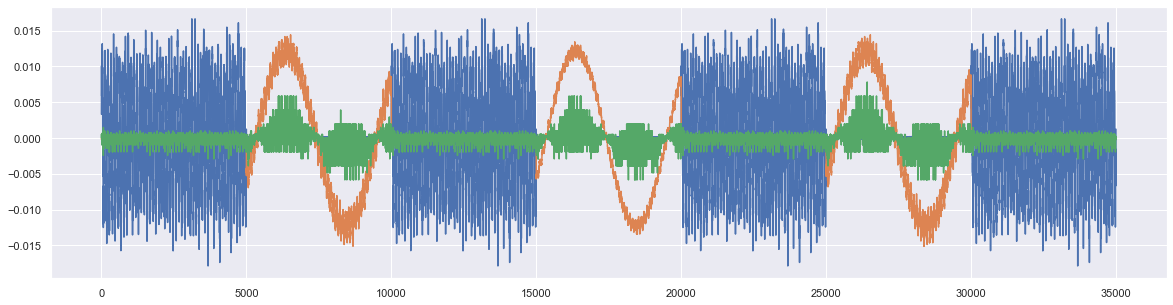

In [329]:
fig = plt.figure(figsize=(20, 5))
plt.plot(X_ica)

---
>> **TASK**
>>
>> [Flow cytometry](https://en.wikipedia.org/wiki/Flow_cytometry) allows researchers to identify, serparate and characterise different cell types. 
>> The detector and analog-to-digital conversion (ADC) system converts analog measurements of forward-scattered light (FSC) and side-scattered light (SSC) as well as dye-specific fluorescence signals into digital signals that can be processed by a computer.
>>
>> ![flowcyt](./Cytometer.png)
>>
>> cyto.csv contains data from flow cytometer.
>>
>> FSCH/SSCH are measurements of the scattering.
>> These parameters can be simplified as measures of a cell's size (FSCH) and a cell's internal complexity (SSCH).
>>
>> FL1_H ... are flourescence parameters. Different fluorochromes were used to distinguish subpopulations.
>>
>> Gate is the label given to each cell by the researcher.
>> Two gates have been identified and labelled as 1 and 2. Noise labelled as -1.
>>
>> - Explore the dataset
>> - Form a model to classify new data points as a particular gate.
>>
---

> #### Importing of data

In [274]:
df = pd.read_csv ('cyto.csv')
df.head()

,FSC_H,SSC_H,FL1_H,FL2_H,FL3_H,FL1_A,FL1_W,Time,Gate
0,309,376,264,198,313,0,0,2,1
1,83,55,139,51,146,0,0,2,1
2,184,198,232,83,124,0,0,2,1
3,169,75,696,22,193,121,26,2,2
4,212,98,166,0,221,0,0,2,1


> #### Data is passed into PCA analysis to reduce dimensions so the following analysis is easier to plot and understand.

In [275]:
from sklearn.decomposition import PCA
X = df.drop(['Gate', 'Time'], axis=1)
y = df.Gate

In [276]:
pca = PCA(n_components=7,svd_solver='auto', random_state=1)
pca.fit(X)

PCA(n_components=7, random_state=1)

> #### As from graphs and calculations below, if 90% of data explained by model is enough, 3 components are chosen for further analysis.

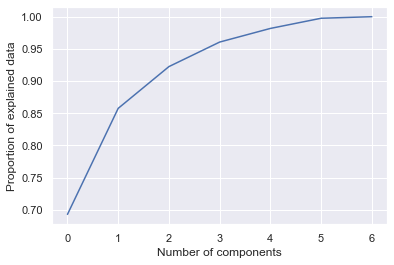

In [277]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Proportion of explained data');

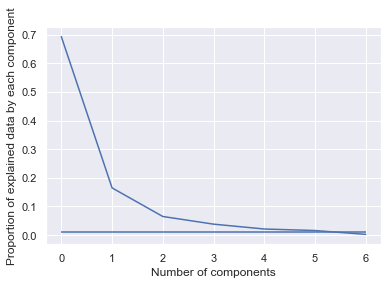

In [278]:
plt.plot(pca.explained_variance_ratio_)
plt.hlines(1/100,0,6)
plt.xlabel('Number of components')
plt.ylabel('Proportion of explained data by each component');

In [279]:
pca = PCA(0.90).fit(X)
pca.n_components_

3

> #### After PCA data's dimensions are reduced from 9 to 3.

In [280]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)
df.shape

(1545, 9)

In [281]:
X_pca.shape

(1545, 3)

C:\Users\jurga.jasinskaite\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


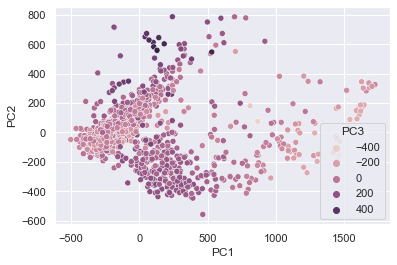

In [282]:
X_pca_df = pd.DataFrame(X_pca, columns=['PC1','PC2','PC3'])
ax = sns.scatterplot('PC1','PC2', 'PC3', data=X_pca_df, hue = y)

## > CLUSTERING

> #### First clusterring methon used is k-Nearest Neighbors, which gives a 0.959 score.

In [283]:
from sklearn.neighbors import KNeighborsClassifier

In [284]:
X = X_pca_df
y = df.Gate

In [285]:
from sklearn.model_selection import train_test_split
##Splitting data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [286]:
X_train.shape

(1158, 3)

In [287]:
X_test.shape

(387, 3)

In [288]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.958656330749354

C:\Users\jurga.jasinskaite\Anaconda3\lib\site-packages\matplotlib\collections.py:922: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


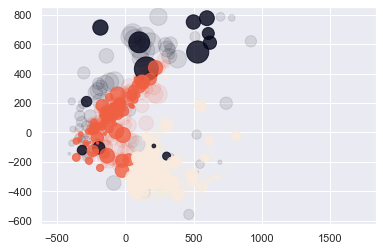

In [289]:
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], X_train.iloc[:, 2], alpha=0.1, c=y_train);
plt.scatter(X_test.iloc[:,0], X_test.iloc[:,1], X_test.iloc[:,2], alpha=0.8, c=y_test);

> #### Next I tried Bayes classification method which have a score of 0.912.

In [290]:
from sklearn.naive_bayes import GaussianNB

In [291]:
from sklearn.metrics import accuracy_score
model = GaussianNB()
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=1)
model.fit(Xtrain, ytrain)
ynew = model.predict(Xtest)
accuracy_score(ytest, ynew)

0.9121447028423773

C:\Users\jurga.jasinskaite\Anaconda3\lib\site-packages\matplotlib\collections.py:922: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


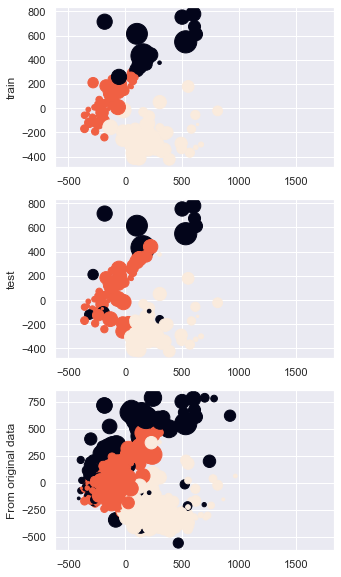

In [292]:
fig, ax = plt.subplots(3, 1, figsize=(5,10))
ax[0].scatter(Xtest.iloc[:, 0], Xtest.iloc[:, 1], Xtest.iloc[:, 2],c=ynew)
ax[0].set_ylabel("train")
ax[1].scatter(Xtest.iloc[:, 0], Xtest.iloc[:, 1], Xtest.iloc[:, 2],c=ytest)
ax[1].set_ylabel("test");
ax[2].scatter(X_pca_df.iloc[:, 0], X_pca_df.iloc[:, 1], X_pca_df.iloc[:, 2],alpha=1, c=y);
ax[2].set_ylabel("From original data");

> #### Next method is KMeans which clustered the results quite well despite not having the "Gate" column available.

In [293]:
from sklearn.cluster import KMeans

In [294]:
kmeans = KMeans(n_clusters=3, n_init=10)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
y_kmeans

array([1, 1, 1, ..., 1, 0, 1])

C:\Users\jurga.jasinskaite\Anaconda3\lib\site-packages\matplotlib\collections.py:922: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


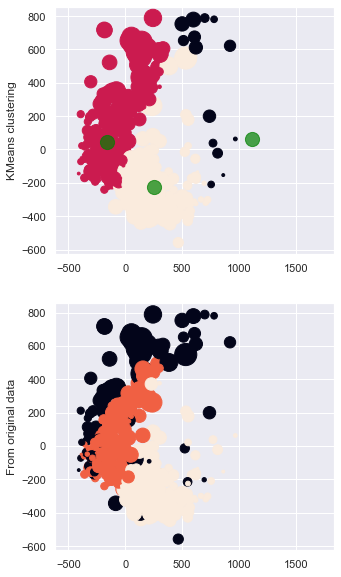

In [295]:
fig, ax = plt.subplots(2, 1, figsize=(5,10))
centers = kmeans.cluster_centers_
ax[0].scatter(X_pca_df.iloc[:, 0], X_pca_df.iloc[:, 1], X_pca_df.iloc[:, 2],alpha=1, c=y_kmeans)
ax[0].scatter(centers[:, 0], centers[:, 1], c="green", s=200, alpha=0.7);
ax[0].set_ylabel("KMeans clustering")
ax[1].scatter(X_pca_df.iloc[:, 0], X_pca_df.iloc[:, 1], X_pca_df.iloc[:, 2],alpha=1, c=y);
ax[1].set_ylabel("From original data");

#### Additional results:
##### Logistic Regression	 91%
##### Support Vector Machine	84%
##### Random Forest	90%


In [296]:
X1 = df.drop(['Gate', 'Time'], axis=1)
y1 = df.Gate

In [297]:
import sklearn as sk
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr').fit(X1, y1)
LR.predict(X1.iloc[460:,:])
round(LR.score(X1,y1), 4)

0.9081

In [298]:
from sklearn import svm

SVM = svm.LinearSVC()
SVM.fit(X1, y1)
SVM.predict(X1.iloc[460:,:])
round(SVM.score(X1,y1), 4)

C:\Users\jurga.jasinskaite\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.8777

In [299]:
import sklearn as sk
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
RF.fit(X1, y1)
RF.predict(X1.iloc[460:,:])
round(RF.score(X1,y1), 4)

0.9042

> #### Trying to implement Binary classification algorithm but it is not working for some reason and I cannot troubleshoot it.

In [300]:
train_data, test_data, train_labels, test_labels = train_test_split(X, y, random_state=1)

In [301]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')
x_train = np.asarray(train_labels).astype('float32')
x_test = np.asarray(test_labels).astype('float32')

In [302]:
from keras import layers, models
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_7 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [303]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [304]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [305]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20


ValueError: in user code:

    C:\Users\jurga.jasinskaite\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:805 train_function  *
        return step_function(self, iterator)
    C:\Users\jurga.jasinskaite\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\jurga.jasinskaite\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\jurga.jasinskaite\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\jurga.jasinskaite\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\jurga.jasinskaite\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:788 run_step  **
        outputs = model.train_step(data)
    C:\Users\jurga.jasinskaite\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:754 train_step
        y_pred = self(x, training=True)
    C:\Users\jurga.jasinskaite\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\jurga.jasinskaite\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:255 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer sequential_2 is incompatible with the layer: expected axis -1 of input shape to have value 10000 but received input with shape (None, 1)
